In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [4]:
%matplotlib inline

https://victorzhou.com/blog/intro-to-neural-networks/

# original approach

![](https://victorzhou.com/27cf280166d7159c0465a58c68f99b39/network3.svg)

In [ ]:
def sigmoid(x):
    # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)


def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred)**2).mean()


class OurNeuralNetwork:
    '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''

    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
        learn_rate = 0.1
        epochs = 1000  # number of times to loop through the entire dataset
        res = []
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                #print("Epoch %d loss: %.3f" % (epoch, loss))
                res += [epoch, loss]
        return res


# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],  # Bob
    [17, 4],  # Charlie
    [-15, -6],  # Diana
])
all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
res = network.train(data, all_y_trues)

In [ ]:
plt.plot(np.array(res[0::2]), np.array(res[1::2]))

## produce variable in large quantity

In [ ]:
"a{}".format(1) 

## Robust code

In [ ]:
def add(x: int, y: int):
    if type(x) == int and type(y) == int:
        return x + y
    else:
        print("Argument should has data type as int")
        raise (TypeError)


add(2, 3)
add(2, 3.0)

In [ ]:
x = [1,2.0,3]

any(i > 2 for i in x)
any([i > 2 for i in x])
all(i > 2 for i in x)
all(i == int for i in x)
all(i == type for i in x)
all(type(i) == int for i in x)

In [ ]:
def add(*args):
    if all(type(i) == int for i in args):
        return sum(args)
    else:
        print("Argument should has data type as int")
        raise (TypeError)

add(2, 3)
add(2, 3.0)

# A little modification of original approach

In [ ]:
def mse_loss(y_true, y_pred):
    if type(y_true) == np.ndarray and type(y_pred) == np.ndarray:
        return ((y_true - y_pred)**2).mean()
    else:
        raise (TypeError)
        
mse_loss(np.array([1, 2]), np.array([3, 4]))
mse_loss(np.array([1, 2]), [3, 4])

In [ ]:
dot = lambda w, x: w[0] * x[0] + w[1] * x[1]
sigmoid = lambda x: 1 / (1 + np.exp(-x))
mse_loss = lambda y_true, y_pred: ((y_true - y_pred)**2).mean()
deriv_sigmoid = lambda x: sigmoid(x) * (1 - sigmoid(x))


class OurNeuralNetwork:
    def __init__(self):
        number_of_weights = 6
        number_of_bias = 3

        self.w = [0] * number_of_weights
        for i in range(1, number_of_weights):
            self.w[i] = np.random.normal()

        self.b = [0] * number_of_bias
        for i in range(1, number_of_bias):
            self.b[i] = np.random.normal()

    def feedforward(self, x):
        h = [0] * 2
        h[0] = sigmoid(dot(self.w[0:2], x) + self.b[0])
        h[1] = sigmoid(dot(self.w[2:4], x) + self.b[1])
        o1 = sigmoid(dot(self.w[4:6], h) + self.b[2])
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000
        res = []
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):

                h = [0] * 2
                """
                s = [0] * 3
                
                for i in range(3):
                    s[i] = dot(self.w[2i: 2(i+1)], self.b[i])
                    h[i] = sigmoid(s[i])
                """
                sum_h0 = dot(self.w[0:2], x) + self.b[0]
                h[0] = sigmoid(sum_h0)
                sum_h1 = dot(self.w[2:4], x) + self.b[1]
                h[1] = sigmoid(sum_h1)

                sum_o1 = dot(self.w[4:6], h) + self.b[2]
                y_pred = sigmoid(sum_o1)

                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w4 = h[0] * deriv_sigmoid(sum_o1)
                d_ypred_d_w5 = h[1] * deriv_sigmoid(sum_o1)
                d_ypred_d_b2 = deriv_sigmoid(sum_o1)

                d_ypred_d_h0 = self.w[4] * deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w[5] * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h0_d_w0 = x[0] * deriv_sigmoid(sum_h0)
                d_h0_d_w1 = x[1] * deriv_sigmoid(sum_h0)
                d_h0_d_b0 = deriv_sigmoid(sum_h0)

                # Neuron h2
                d_h1_d_w2 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w3 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # --- Update weights and biases
                # Neuron h1
                self.w[0] -= learn_rate * d_L_d_ypred * d_ypred_d_h0 * d_h0_d_w0
                self.w[1] -= learn_rate * d_L_d_ypred * d_ypred_d_h0 * d_h0_d_w1
                self.b[0] -= learn_rate * d_L_d_ypred * d_ypred_d_h0 * d_h0_d_b0

                # Neuron h2
                self.w[2] -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.w[3] -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w3
                self.b[1] -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron o1
                self.w[4] -= learn_rate * d_L_d_ypred * d_ypred_d_w4
                self.w[5] -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.b[2] -= learn_rate * d_L_d_ypred * d_ypred_d_b2

            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                #print("Epoch %d loss: %.3f" % (epoch, loss))
                res += [epoch, loss]
        return res


# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],  # Bob
    [17, 4],  # Charlie
    [-15, -6],  # Diana
])
all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
res = network.train(data, all_y_trues)

In [ ]:
_ = plt.plot(np.array(res[0::2]), np.array(res[1::2]))
_ = plt.xlabel("eporch")
_ = plt.ylabel("loss")

# Abstract the pattern

<span style="font-family:New York Times; font-size:1.2em; color:red;">


ToDo: Apply the principle Explicit is better than implicit thoroughly

* or hard to locate where went wrong
* It takes a long time compare to the original approach

In [ ]:
import sympy
from sympy import Lambda
from  sympy import abc, Derivative, diff

In [ ]:
dot = lambda w, x, bias: w[0] * x[0] + w[1] * x[1] + bias
sigmoid = Lambda(abc.x, 1 / (1 + sympy.exp(-abc.x)))
dsig = Lambda(abc.x, diff(sigmoid(abc.x), abc.x))
mse_loss = lambda y_true, y_pred: ((y_true - y_pred)**2).mean()

In [ ]:
class OurNeuralNetwork:
    def __init__(self):
        number_of_weights = 6
        number_of_bias = 3

        self.w = [0] * number_of_weights
        for i in range(1, number_of_weights):
            self.w[i] = np.random.normal()

        self.b = [0] * number_of_bias
        for i in range(0, number_of_bias):
            self.b[i] = np.random.normal()

    def feedforward(self, x):
        h = [0] * 2
        h[0] = sigmoid(dot(self.w[0:2], x, self.b[0]))
        h[1] = sigmoid(dot(self.w[2:4], x, self.b[1]))
        o1 = sigmoid(dot(self.w[4:6], h, self.b[2]))
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000
        res = []
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):

                s = [0] * 3
                h = [0] * 2
                for i in range(2):
                    s[i] = dot(self.w[2*i : 2*(i + 1)], x, self.b[i])
                    h[i] = sigmoid(s[i])

                s[2] = dot(self.w[4:6], h, self.b[2])
                #y_pred = s[2]
                y_pred = sigmoid(s[2])

                d_L_d_ypred = -2 * (y_true - y_pred)

                ww = sympy.Array([abc.a, abc.b])
                xx = sympy.Array([abc.m, abc.n])
                bias = abc.kappa
                table1 = sympy.derive_by_array(dot(ww, xx, bias), \
                                               [ww[0], ww[1], xx[0], xx[1], bias])

                d_ypred = [0] * 5
                for i in range(5):
                    d_ypred[i] = table1[i].subs({
                        ww[0]: self.w[4],
                        ww[1]: self.w[5],
                        xx[0]: h[0],
                        xx[1]: h[1],
                        bias: self.b[2]
                    }) * dsig(abc.lamda).subs({abc.lamda: s[2]})

                table2 = sympy.derive_by_array(dot(ww, xx, bias),
                                               [ww[0], ww[1], bias])
                d_h0 = [0] * 3
                d_h1 = [0] * 3
                for i in range(3):
                    d_h0[i] = table2[i].subs({xx[0]: x[0], xx[1]: x[1],bias: self.b[0]}) *\
                              dsig(abc.lamda).subs({abc.lamda:s[0]})

                    d_h1[i] = table2[i].subs({
                        xx[0]: x[0],
                        xx[1]: x[1],
                        bias: self.b[1]
                    }) * dsig(abc.lamda).subs({abc.lamda: s[1]})
                
                # Neuron h1
                self.w[0] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[0]
                self.w[1] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[1]
                self.b[0] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[2]
                
                # Neuron h2
                self.w[2] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[0]
                self.w[3] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[1]
                self.b[1] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[2]

                # Neuron o1
                self.w[4] -= learn_rate * d_L_d_ypred * d_ypred[0]
                self.w[5] -= learn_rate * d_L_d_ypred * d_ypred[1]
                self.b[2] -= learn_rate * d_L_d_ypred * d_ypred[4]

            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                res += [epoch, loss]
        return res


# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],  # Bob
    [17, 4],  # Charlie
    [-15, -6],  # Diana
])
all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
res = network.train(data, all_y_trues)

In [ ]:
_ = plt.plot(np.array(res[0::2]), np.array(res[1::2]))
_ = plt.xlabel("eporch")
_ = plt.ylabel("loss")

## new version

In [6]:
dot = lambda w, x, bias: w[0] * x[0] + w[1] * x[1] + bias
sigmoid = lambda x: 1 / (1 + np.exp(-x))
dsig = lambda x: sigmoid(x) * (1- sigmoid(x))
mse_loss = lambda y_true, y_pred: ((y_true - y_pred)**2).mean()

In [7]:
class OurNeuralNetwork:
    def __init__(self):
        number_of_weights = 6
        number_of_bias = 3

        self.w = [0] * number_of_weights
        for i in range(1, number_of_weights):
            self.w[i] = np.random.normal()

        self.b = [0] * number_of_bias
        for i in range(0, number_of_bias):
            self.b[i] = np.random.normal()

    def feedforward(self, x):
        h = [0] * 2
        h[0] = sigmoid(dot(self.w[0:2], x, self.b[0]))
        h[1] = sigmoid(dot(self.w[2:4], x, self.b[1]))
        o1 = sigmoid(dot(self.w[4:6], h, self.b[2]))
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000
        res = []
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):

                s = [0] * 3
                h = [0] * 2
                for i in range(2):
                    s[i] = dot(self.w[2*i : 2*(i + 1)], x, self.b[i])
                    h[i] = sigmoid(s[i])

                s[2] = dot(self.w[4:6], h, self.b[2])
                y_pred = sigmoid(s[2])

                d_L_d_ypred = -2 * (y_true - y_pred)
                
                """
                ww = sympy.Array([abc.a, abc.b])
                xx = sympy.Array([abc.m, abc.n])
                bias = abc.kappa
                
                table = sympy.derive_by_array(dot(ww, xx, bias), [ww[0], ww[1], xx[0], xx[1], bias])
               
                table2 = table.subs({
                        ww[0]: self.w[4],
                        ww[1]: self.w[5],
                        xx[0]: h[0],
                        xx[1]: h[1],
                        bias: self.b[2]
                    })
                """
                table2 = [h[0], h[1], self.w[4], self.w[5], 1]
                
                
                d_ypred = [0] * 5
                for i in range(5):
                    d_ypred[i] = table2[i] * dsig(s[2])
                """
                table = sympy.derive_by_array(dot(ww, xx, bias), [ww[0], ww[1], bias])
                table1 = table.subs({xx[0]: x[0], xx[1]: x[1], bias: self.b[1]}) 
                table0 = table.subs({xx[0]: x[0], xx[1]: x[1], bias: self.b[0]}) 
                """
                table1 = [self.w[2], self.w[3], 1]
                table0 = [self.w[0], self.w[1], 1]
                d_h0 = [0] * 3
                d_h1 = [0] * 3
                for i in range(3):
                    d_h0[i] = table0[i] * dsig(s[0])
                    d_h1[i] = table1[i] * dsig(s[1])
                
                # Neuron h1
                self.w[0] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[0]
                self.w[1] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[1]
                self.b[0] -= learn_rate * d_L_d_ypred * d_ypred[2] * d_h0[2]
                
                # Neuron h2
                self.w[2] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[0]
                self.w[3] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[1]
                self.b[1] -= learn_rate * d_L_d_ypred * d_ypred[3] * d_h1[2]

                # Neuron o1
                self.w[4] -= learn_rate * d_L_d_ypred * d_ypred[0]
                self.w[5] -= learn_rate * d_L_d_ypred * d_ypred[1]
                self.b[2] -= learn_rate * d_L_d_ypred * d_ypred[4]

            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                res += [epoch, loss]
        return res


# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],  # Bob
    [17, 4],  # Charlie
    [-15, -6],  # Diana
])
all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
res = network.train(data, all_y_trues)

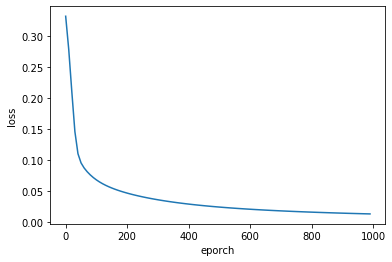

In [12]:
_ = plt.plot(np.array(res[0::2]), np.array(res[1::2]))
_ = plt.xlabel("eporch")
_ = plt.ylabel("loss")